In [1]:
%load_ext autoreload

In [2]:
import sys
sys.path.append('../')
from transformscomp import *

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

from torchvision import transforms as T

/Users/yz/miniconda3/envs/hw1/lib/python3.9/site-packages/torchvision/transforms/transforms.py:257: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
/Users/yz/miniconda3/envs/hw1/lib/python3.9/site-packages/torchvision/transforms/transforms.py:803: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [3]:
plt.rcParams["savefig.bbox"] = 'tight'
img = Image.open(Path('../assets') / 'imgnet.jpeg')
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(orig_img, imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()
    
def plot_transform(transform, img, n):
    transformer = transform
    transform_imgs = [transformer(img) for _ in range(n)]
    plot(img, transform_imgs)
def plot_transform_n(transform, img, n):
    transformer = T.Compose([transform, T.ToPILImage()])
    transform_imgs = [transformer(img) for _ in range(n)]
    plot(img, transform_imgs)

Debug: transform1 is randcrop, transform2 is randcrop. Training on moco: False.



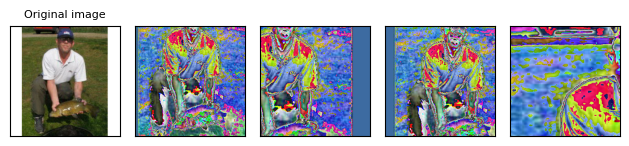

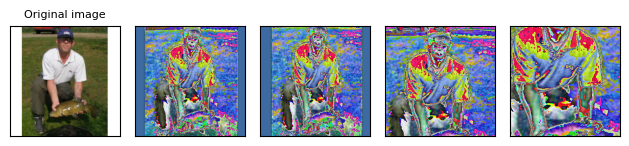

In [4]:
t = trans_566("randcrop","randcrop")
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)

Debug: transform1 is randcrop, transform2 is colorjit. Training on moco: False.



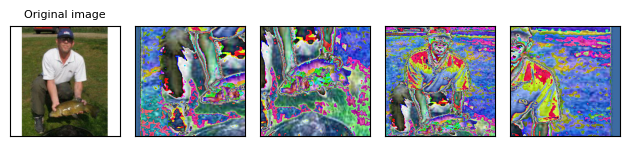

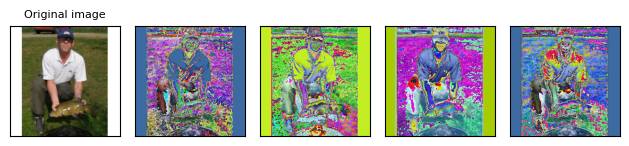

In [5]:
t = trans_566("randcrop","colorjit")
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)

Debug: transform1 is randcrop, transform2 is skew. Training on moco: False.



/Users/yz/miniconda3/envs/hw1/lib/python3.9/site-packages/torchvision/transforms/functional.py:564: UserWarning: torch.lstsq is deprecated in favor of torch.linalg.lstsq and will be removed in a future PyTorch release.
torch.linalg.lstsq has reversed arguments and does not return the QR decomposition in the returned tuple (although it returns other information about the problem).
To get the qr decomposition consider using torch.linalg.qr.
The returned solution in torch.lstsq stored the residuals of the solution in the last m - n columns of the returned value whenever m > n. In torch.linalg.lstsq, the residuals in the field 'residuals' of the returned named tuple.
The unpacking of the solution, as in
X, _ = torch.lstsq(B, A).solution[:A.size(1)]
should be replaced with
X = torch.linalg.lstsq(A, B).solution (Triggered internally at  /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_2a19nf9hj1/croot/pytorch_1675190251927/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:4169.)
 

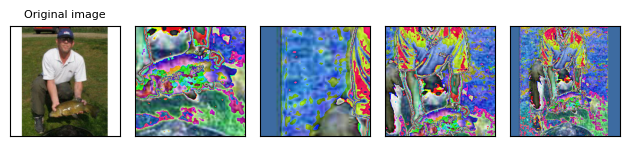

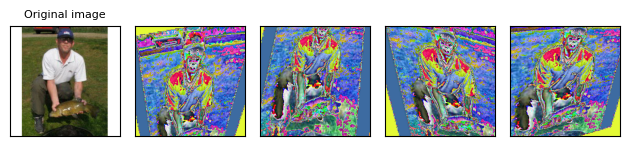

In [6]:
t = trans_566("randcrop","skew")
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)

Debug: transform1 is randcrop, transform2 is grid. Training on moco: False.



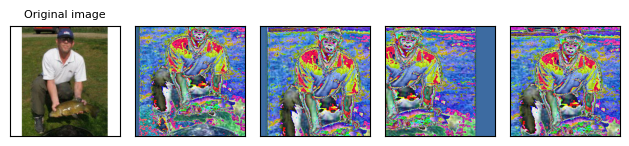

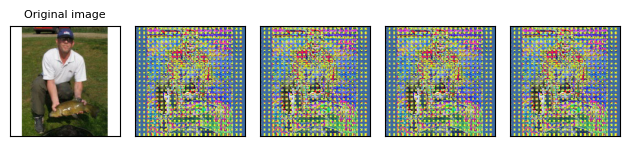

In [7]:
t = trans_566("randcrop","grid")
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)

Debug: transform1 is randcrop, transform2 is randmosaic. Training on moco: False.



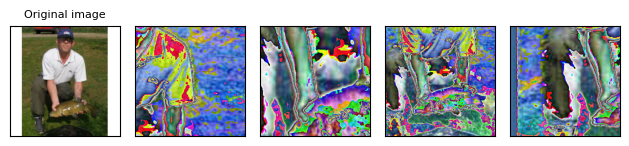

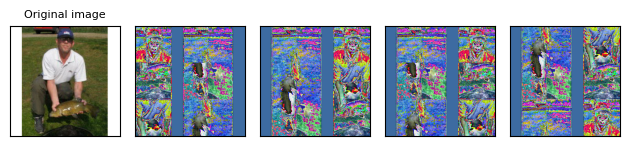

In [8]:
t = trans_566("randcrop","randmosaic")
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)

Debug: transform1 is colorjit, transform2 is colorjit. Training on moco: False.



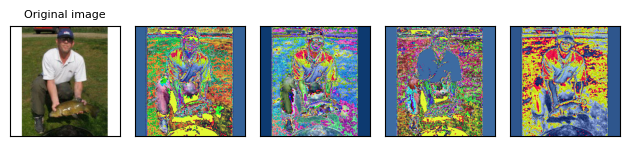

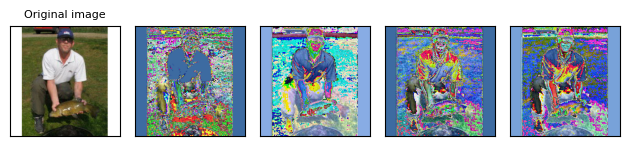

In [9]:
t = trans_566("colorjit","colorjit")
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)

Debug: transform1 is colorjit, transform2 is skew. Training on moco: False.



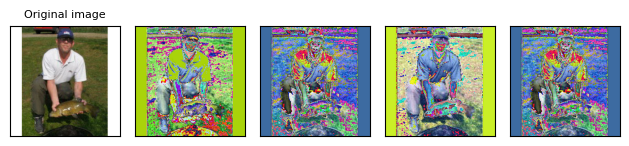

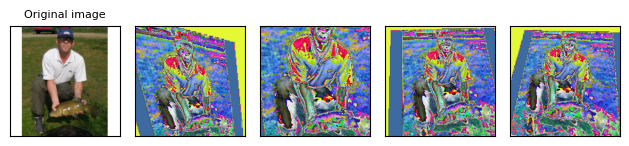

In [10]:
t = trans_566("colorjit","skew")
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)

Debug: transform1 is colorjit, transform2 is grid. Training on moco: False.



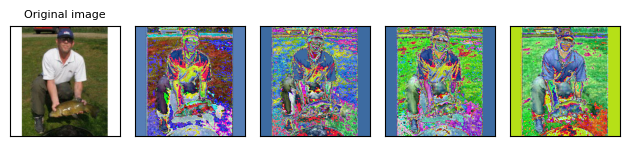

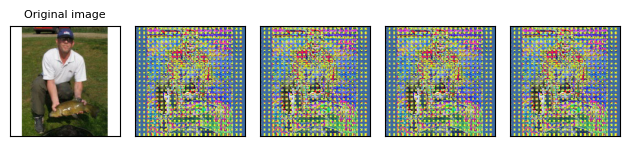

In [11]:
t = trans_566("colorjit","grid")
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)

Debug: transform1 is colorjit, transform2 is randmosaic. Training on moco: False.



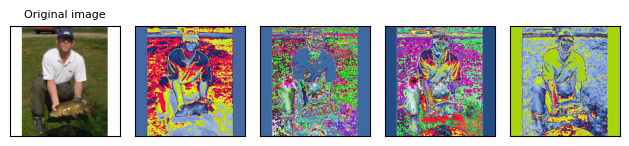

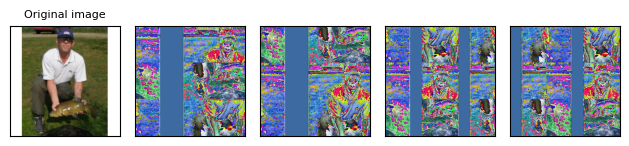

In [12]:
t = trans_566("colorjit","randmosaic")
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)

Debug: transform1 is skew, transform2 is skew. Training on moco: False.



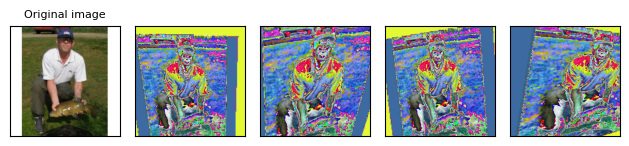

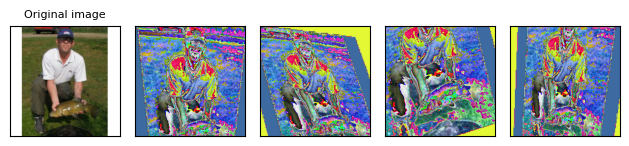

In [13]:
t = trans_566("skew","skew")
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)

Debug: transform1 is skew, transform2 is grid. Training on moco: False.



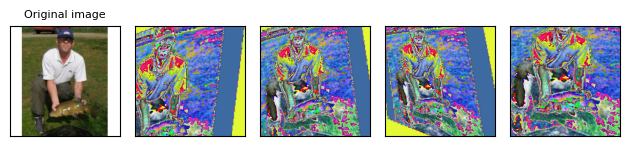

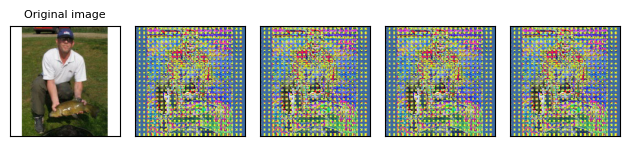

In [14]:
t = trans_566("skew","grid")
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)

Debug: transform1 is skew, transform2 is randmosaic. Training on moco: False.



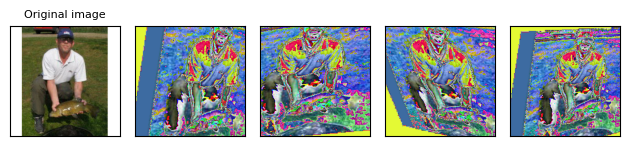

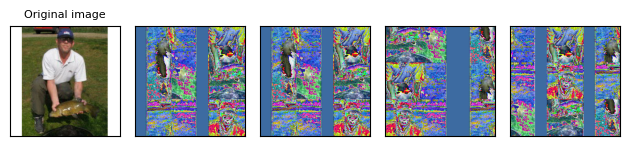

In [15]:
t = trans_566("skew","randmosaic")
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)

Debug: transform1 is grid, transform2 is grid. Training on moco: False.



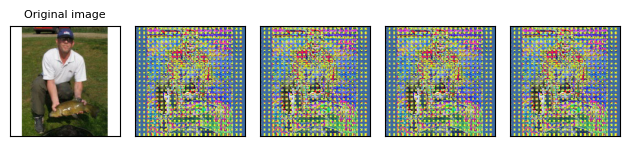

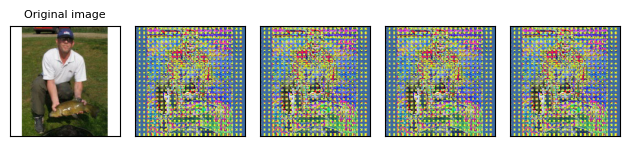

In [16]:
t = trans_566("grid","grid")
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)

Debug: transform1 is grid, transform2 is randmosaic. Training on moco: False.



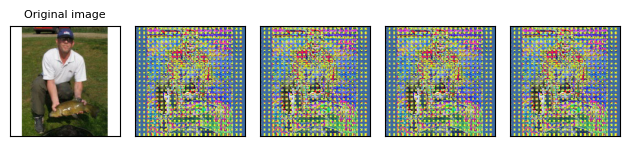

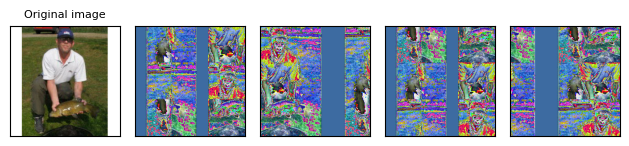

In [17]:
t = trans_566("grid","randmosaic")
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)

Debug: transform1 is randmosaic, transform2 is randmosaic. Training on moco: False.



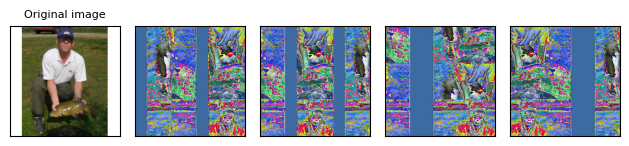

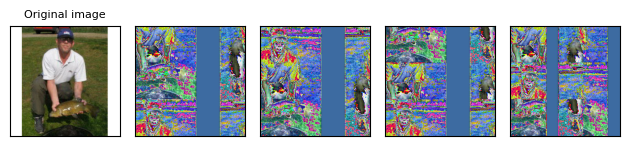

In [18]:
t = trans_566("randmosaic","randmosaic")
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)

/Users/yz/miniconda3/envs/hw1/lib/python3.9/site-packages/torchvision/transforms/transforms.py:803: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


Debug: transform1 is randmosaic, transform2 is randmosaic. Training on moco: True.



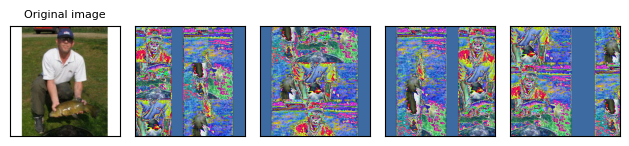

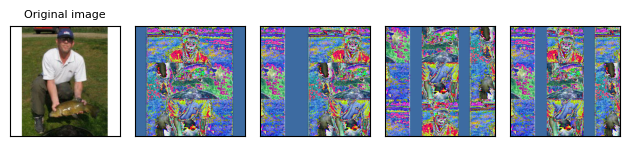

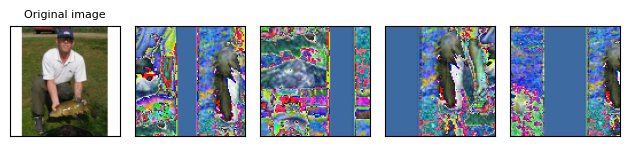

In [19]:
t = trans_566("randmosaic","randmosaic", True)
plot_transform_n(t.t1, img, 4)
plot_transform_n(t.t2, img, 4)
plot_transform_n(t.t3, img, 4)

